<a href="https://colab.research.google.com/github/Riasci/KomputasiIntelegensiaTasks/blob/main/MidtermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ria Mulyadi

NPM: 2206048556

# 1.

**Di Google Colab, instal pustaka yang diperlukan untuk menjalankan model BERT, termasuk PyTorch dan pustaka Hugging Face Transformers. Jelaskan peran dari setiap pustaka.**

In [ ]:
!pip install torch
!pip install transformers
!pip install evaluate
!pip install torch-summary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Dataset yang digunakan diambil dari: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

In [ ]:
# Matplotlib inline for visualization in Jupyter
%matplotlib inline

# Data Manipulation and Processing
import pandas as pd
import numpy as np
import os
import re
import string
from collections import defaultdict
from textwrap import wrap
from datasets import Dataset


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch and Torch Utilities
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

# Transformers and Hugging Face Libraries
from transformers import (
    BertTokenizer, BertweetTokenizer, BertForSequenceClassification,
    AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments,
    AdamW, get_linear_schedule_with_warmup
)

# Hugging Face Datasets and Evaluate
from datasets import load_dataset, Dataset
from evaluate import load as load_metric

# Scikit-Learn for Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_recall_fscore_support
)


1. Pandas dan NumPy (`pandas`, `numpy`)
Penggunaan: Digunakan untuk memuat, membersihkan, dan memanipulasi data tabular. Data umumnya dimuat dalam format CSV atau TSV, kemudian diubah ke dalam bentuk DataFrame agar mudah diakses, diubah, dan diproses. Pandas membantu dalam pre-processing data teks sebelum disiapkan untuk model.
Contoh: Membaca file CSV dengan data teks dan label kelas yang akan digunakan sebagai input model.

2. Matplotlib dan Seaborn (`matplotlib.pyplot`, `seaborn`)
Penggunaan: Memvisualisasikan data dan hasil evaluasi model, seperti akurasi, loss, dan metrik lainnya. Grafik seperti confusion matrix, distribusi kelas, dan plot hasil model dapat membantu dalam memahami kinerja model.
Contoh: Membuat plot confusion matrix untuk melihat bagaimana model memprediksi setiap kelas.
3. PyTorch (`torch`, `torch.nn`, `torch.optim`, `torch.utils.data`)
Penggunaan: PyTorch adalah framework deep learning yang mendukung eksekusi model di CPU dan GPU, dan sangat populer untuk pengembangan model berbasis transformer. Dalam konteks ini, PyTorch digunakan untuk mendefinisikan model, mengelola training loop, dan menyediakan utilities seperti Dataset dan DataLoader untuk batching data.
Contoh: Menggunakan torch.nn untuk mendefinisikan lapisan neural network dan torch.optim untuk optimisasi model.

4. Transformers dari Hugging Face (`transformers`)
Penggunaan: Pustaka utama untuk memuat dan menjalankan model transformer seperti BERT, DistilBERT, atau BERTweet. `transformers` menyediakan berbagai model siap pakai untuk tugas NLP (klasifikasi teks, analisis sentimen, dll.), bersama dengan tokenizer untuk preprocessing teks.
Fungsi Utama:
Tokenizer (e.g., `BertTokenizer`, `AutoTokenizer`): Mengonversi teks menjadi representasi numerik (token) yang diperlukan oleh model. Tokenizer mengelola konversi teks ke token ID, penambahan token khusus seperti [CLS] dan [SEP], serta padding.
Model (e.g., `BertForSequenceClassification`, `AutoModelForSequenceClassification`): Model transformer yang di-pretrained dan siap digunakan untuk klasifikasi urutan atau tugas-tugas serupa.
Trainer dan TrainingArguments: API yang menyederhanakan proses pelatihan, evaluasi, dan optimisasi model, dengan menambahkan dukungan untuk GPU dan distribusi.
Contoh: Menggunakan `BertForSequenceClassification` untuk melakukan klasifikasi teks, dengan Trainer untuk menjalankan training.

5. Datasets dari Hugging Face (`datasets`)
Penggunaan: Pustaka ini menyediakan akses ke berbagai dataset NLP dan membantu dalam mempersiapkan data untuk input model. datasets menangani pre-processing dan menyediakan utilities untuk mengonversi data menjadi batch, melakukan split dataset, dan mengoptimalkan pemrosesan data.
Contoh: Menggunakan load_dataset untuk memuat dataset secara langsung dan kemudian menggunakannya sebagai input untuk model.

6. Evaluate dari Hugging Face (`evaluate`)
Penggunaan: Memuat metrik evaluasi standar untuk mengukur kinerja model, seperti akurasi, precision, recall, dan F1 score. evaluate menyediakan API untuk mengukur metrik dengan cepat pada dataset.
Contoh: Menggunakan load_metric untuk memuat metrik seperti akurasi dan F1 score, yang kemudian dihitung dari prediksi model pada data validasi atau tes.

7. Scikit-Learn (`sklearn`)
Penggunaan: Menyediakan tools untuk evaluasi model dan pengolahan data yang lebih lanjut, seperti pembagian data (`train_test_split`) dan evaluasi klasifikasi (`accuracy_score`, `classification_report`). Digunakan untuk menghitung dan menganalisis metrik secara lebih terperinci.
Contoh: Membagi dataset menjadi train dan test set menggunakan `train_test_split`, dan menghitung metrik evaluasi seperti confusion matrix dengan `confusion_matrix`.

In [ ]:
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"Device: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available. Please check runtime settings.")


GPU is available!
Device: Tesla T4


# 2.

 **Muat model BERT yang telah dilatih dari Hugging Face model hub dan jelaskan cara BERT memproses data masukan.**

In [ ]:
# Load model directly
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Memindahkan model ke GPU jika tersedia
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

## BERT (Bidirectional Encoder Representations from Transformers)

BERT adalah model berbasis transformer yang menggunakan teknik tokenisasi khusus dan mekanisme self-attention untuk memproses data masukan. Berikut ini adalah penjelasan langkah-langkah BERT dalam melakukan tokenisasi, memproses data masukan dengan self-attention, dan menghasilkan prediksi.

### 1. Tokenisasi pada Data Masukan

**Langkah Tokenisasi:** Sebelum data masukan (teks) diberikan ke model, BERT mengubah teks menjadi representasi numerik melalui proses tokenisasi. Tokenizer BERT melakukan:

- **Pemisahan Sub-Kata**: Tokenizer memecah kata yang tidak umum menjadi unit sub-kata agar mampu menangani kata yang jarang muncul atau baru.
- **Token Khusus**: Menambahkan token khusus seperti `[CLS]` di awal teks sebagai representasi keseluruhan input untuk tugas klasifikasi, dan `[SEP]` untuk menandai akhir dari urutan input atau batas antara dua teks (jika ada).
- **Padding dan Truncation**: Menambahkan padding hingga panjang yang ditentukan atau memotong teks yang terlalu panjang, agar data masuk memiliki panjang yang sama dalam batch.
- **Masking**: Memberikan mask pada token padding untuk menghindari pengaruh token tersebut dalam proses perhitungan model.

**Output Tokenisasi**: Hasil dari tokenisasi adalah ID token (indeks dari setiap token dalam kosakata BERT), segmen ID (untuk menandai bagian yang berbeda dalam satu urutan input), dan attention mask (untuk mengabaikan token padding dalam perhitungan model).

### 2. Memproses Input dengan Self-Attention di BERT

- **Positional Encoding**: Karena BERT adalah model tanpa komponen RNN atau CNN, ia tidak memiliki kesadaran posisi urutan secara alami. Oleh karena itu, BERT menambahkan informasi posisi pada setiap token melalui positional encoding, sehingga model dapat memahami urutan kata dalam teks.

- **Mekanisme Self-Attention**: BERT menggunakan self-attention untuk memungkinkan model menangkap hubungan antar kata dalam teks, baik yang berdekatan maupun yang jauh.

  - **Perhitungan Self-Attention**: Self-attention menghitung bobot atensi antara setiap token dengan token lainnya dalam satu urutan. Untuk setiap token, BERT menghitung tiga representasi: **Query (Q)**, **Key (K)**, dan **Value (V)**. Hasil dot-product antara Query dan Key memberikan bobot perhatian antar token. Bobot ini kemudian digunakan untuk menimbang representasi Value dari setiap token.
  
  - **Multi-Head Attention**: Untuk menangkap berbagai hubungan dalam teks, BERT menggunakan multi-head attention, yaitu menghitung beberapa set perhatian secara paralel dan menggabungkan hasilnya. Hal ini memungkinkan BERT untuk menangkap konteks yang lebih kaya.

  - **Layer Normalization dan Feed-Forward Layers**: Setelah self-attention, hasilnya melalui layer normalization dan lapisan feed-forward untuk memproses informasi lebih lanjut.

- **Proses Encoder**: BERT terdiri dari beberapa lapisan encoder yang menumpuk. Setiap lapisan encoder ini berisi mekanisme self-attention dan lapisan feed-forward. Data masukan melalui setiap lapisan encoder, memperkaya representasinya dan memperdalam pemahaman konteks antar kata.

### 3. Menghasilkan Prediksi untuk Tugas Klasifikasi Teks atau Prediksi Perilaku

- **Ekstraksi Representasi dari Token `[CLS]`**: Untuk tugas klasifikasi, BERT menggunakan representasi token `[CLS]`, yang telah diproses oleh seluruh lapisan encoder. Representasi `[CLS]` ini dianggap sebagai representasi keseluruhan teks masukan, karena sudah mengintegrasikan informasi dari seluruh token dalam urutan masukan.

- **Lapisan Klasifikasi**: Representasi `[CLS]` kemudian diumpankan ke lapisan dense (linear) dan dilanjutkan dengan fungsi aktivasi (misalnya softmax untuk klasifikasi multi-kelas atau sigmoid untuk klasifikasi biner).

- **Prediksi Kelas**: Output akhir dari lapisan klasifikasi ini adalah probabilitas untuk setiap kelas, yang merupakan prediksi akhir model. Model kemudian memilih kelas dengan probabilitas tertinggi sebagai hasil prediksi.


# 3.

**Persiapkan data masukan untuk BERT dengan melakukan tokenisasi dan mengonversinya ke format yang kompatibel dengan model.**

In [ ]:
# Contoh teks yang akan diklasifikasi
texts = ["I like you.", "I hate you.", "I love machine learning!", "BERT models are amazing.","I'm really enjoying using BERT models for NLP tasks!"]

# Inisialisasi tokenizer dan model
model_name = "finiteautomata/bertweet-base-sentiment-analysis"  # Nama model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenisasi teks
inputs = tokenizer(
    texts,
    return_tensors="pt",    # Output berupa PyTorch tensor
    truncation=True,        # Potong teks yang panjang
    padding=True            # Tambahkan padding agar panjangnya sama
)
# Menampilkan hasil tokenisasi
print("Input IDs:", inputs['input_ids'])
print("Attention Mask:", inputs['attention_mask'])

# Pindahkan `inputs` ke device yang sama dengan model
inputs = {key: val.to(device) for key, val in inputs.items()}

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Input IDs: tensor([[    0,     8,    43,  3805,     4,     2,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1],
        [    0,     8,   253,  3805,     4,     2,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1],
        [    0,     8,    71,  3569, 23826, 14571,    12,     2,     1,     1,
             1,     1,     1,     1,     1,     1],
        [    0, 45162,  5432,    41, 36148,     4,     2,     1,     1,     1,
             1,     1,     1,     1,     1,     1],
        [    0,   545,    40,   116,  3359,   758, 45162,  5432,    19,   450,
          8583,   543, 11686,   423,    12,     2]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


**Padding dan Attention Mask**

- Padding: Padding digunakan untuk membuat semua teks dalam batch memiliki panjang yang sama, dengan menambahkan token kosong ([PAD]) pada akhir teks yang lebih pendek. Ini sangat penting untuk memungkinkan pemrosesan batch secara paralel.
- Attention Mask: Attention mask adalah tensor biner yang menunjukkan bagian input mana yang berisi token asli dan mana yang merupakan padding. Attention mask bernilai 1 untuk token yang merupakan bagian dari input asli dan 0 untuk token padding. Saat menghitung attention, attention mask mencegah model memperhatikan padding.

**Mekanisme Attention pada BERT**
Mekanisme self-attention memungkinkan BERT untuk memahami konteks setiap kata dalam kalimat secara mendalam. Berikut adalah konsepnya:

- Self-Attention: Setiap token dalam teks saling memberi perhatian (attention) untuk memahami hubungan antar kata. Untuk setiap token, BERT menghitung tiga representasi: Query (Q), Key (K), dan Value (V). Melalui dot product antara Query dan Key, model menghasilkan attention scores yang menunjukkan seberapa besar perhatian satu token terhadap token lain.

- Penghitungan Bobot Attention: Attention scores menunjukkan bobot hubungan antar token. Dengan menggunakan mekanisme softmax, perhatian antar token dinormalisasi sehingga model fokus pada kata-kata penting sesuai konteks.

- Multi-Head Attention: BERT menggunakan beberapa “head” atau saluran attention secara paralel. Setiap head bertanggung jawab untuk mempelajari aspek konteks yang berbeda dalam teks. Hasil dari semua head ini digabungkan, sehingga model dapat memahami konteks teks dari berbagai sudut pandang.

# 4.

**Gunakan BERT untuk klasifikasi urutan atau prediksi perilaku berdasarkan data masukan.**

In [ ]:
# Melakukan prediksi
with torch.no_grad():
    outputs = model(**inputs)
    # Menggunakan softmax untuk mendapatkan probabilitas dari setiap kelas
    probs = torch.softmax(outputs.logits, dim=1)
    predictions = torch.argmax(probs, dim=1)

# Pemetaan label ke kategori sentimen
label_map = {
    0: "Negatif",
    1: "Netral",
    2: "Positif"
}

# Menampilkan hasil prediksi dengan label
for text, prediction in zip(texts, predictions):
    label = label_map[prediction.item()]  # Mengambil label dari kamus
    print(f"Teks: '{text}' - Prediksi Sentimen: {prediction.item()}, {label}")

Teks: 'I like you.' - Prediksi Sentimen: 2, Positif
Teks: 'I hate you.' - Prediksi Sentimen: 0, Negatif
Teks: 'I love machine learning!' - Prediksi Sentimen: 2, Positif
Teks: 'BERT models are amazing.' - Prediksi Sentimen: 2, Positif
Teks: 'I'm really enjoying using BERT models for NLP tasks!' - Prediksi Sentimen: 2, Positif


BERT (Bidirectional Encoder Representations from Transformers) dirancang terutama untuk pemrosesan bahasa alami, namun konsep dan arsitekturnya juga dapat diterapkan untuk jenis data urutan lainnya, termasuk data yang merepresentasikan gerakan objek. Untuk memprediksi tindakan seperti berjalan, berlari, atau diam berdasarkan data urutan yang merepresentasikan gerakan, kita perlu mempersiapkan data dan memahami cara kerja BERT.

**Konversi Data Gerakan ke Format Teks**
Data gerakan, yang biasanya berupa informasi posisi dan kecepatan objek yang dideteksi, perlu dikonversi ke dalam format teks yang dapat diproses. Contohnya, informasi tentang objek yang bergerak dapat disusun menjadi kalimat deskriptif seperti "Orang bergerak ke kanan" atau "Mobil berlari ke arah utara." Dengan cara ini, kita mengubah data numerik menjadi representasi teks yang lebih mudah dipahami oleh model.

**Tokenisasi**
Setelah data gerakan diubah menjadi teks, langkah berikutnya adalah tokenisasi. Proses ini melibatkan pemecahan kalimat menjadi token (kata atau sub-kata) dan mengonversinya menjadi representasi numerik. Tokenizer BERT melakukan beberapa hal penting, seperti:

- Memecah kata-kata menjadi sub-kata untuk menangani kata-kata baru atau jarang.
- Menambahkan token khusus, seperti [CLS] di awal dan [SEP] di akhir kalimat.
- Menerapkan padding untuk menyamakan panjang input dan menghasilkan attention mask yang menunjukkan token mana yang relevan untuk diproses oleh model.

**Memasukkan Data ke dalam Model BERT**
Setelah tokenisasi, data siap untuk dimasukkan ke dalam model BERT. Model akan memproses urutan token ini dengan menggunakan mekanisme self-attention. Mekanisme ini memungkinkan model untuk memperhatikan dan memahami hubungan antar token dalam urutan, baik yang berdekatan maupun yang jauh. Dalam konteks gerakan, ini berarti model dapat menangkap pola pergerakan objek dan bagaimana tindakan mungkin berkembang seiring waktu.

**Mekanisme Self-Attention**
Self-attention di BERT bekerja dengan cara menghitung bobot perhatian antar token, sehingga model dapat menentukan seberapa besar pengaruh setiap token terhadap token lainnya. Ini sangat penting untuk memahami konteks gerakan objek. Misalnya, jika seorang individu bergerak terus-menerus ke arah tertentu selama beberapa frame, model dapat mengenali pola ini dan mengidentifikasi bahwa tindakan tersebut adalah "berjalan" atau "berlari." Mekanisme ini memungkinkan model untuk mempertimbangkan urutan waktu dan perubahan dalam posisi objek.

**Prediksi Tindakan**
Setelah model memproses input, output yang dihasilkan (dalam bentuk logits) kemudian diubah menjadi probabilitas menggunakan fungsi softmax. Ini memungkinkan model untuk memberikan prediksi tentang tindakan yang dilakukan objek berdasarkan data gerakan yang dianalisis. Model dapat dilatih untuk mengklasifikasikan tindakan berdasarkan pola yang dikenali, seperti "berjalan," "berlari," atau "diam."


# 5.

In [ ]:
class IndTweetDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = IndTweetDataset(
        reviews=df.clean_text.to_numpy(),
        targets=df.category.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

**Fine-tune model BERT untuk tugas analisis urutan khusus di Google Colab.**

In [ ]:
#Dataset yang akan digunakan untuk tugas analisis sentiment
df_twitter=pd.read_csv('/content/Twitter_Data.csv')
df_twitter

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
#Ambil sebanyak 8000 data saja untuk fine-tune model
df_twitter_6000 = df_twitter[0:6000]
df_twitter_6000

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
5995,are realising the most awaited episode our ana...,1.0
5996,sirji the tweet was from narendra modis person...,0.0
5997,you dont things only because you expect modi s...,-1.0
5998,modi also said that would give lakh every indi...,0.0


In [ ]:
# Mengubah nilai pada kolom 'category' di dataset agar sesuai dengan label yang digunakan model
df_twitter_6000.loc[:, 'category'] = df_twitter_6000['category'].replace({
    -1: 0,  # Ganti -1 dengan 0
    0: 1,   # Ganti 0 dengan 1
    1: 2    # Ganti 1 dengan 2
})

# Cek nilai unik dalam kolom 'category' untuk memastikan perubahan
print(df_twitter_6000['category'].unique())

[0. 1. 2.]


In [ ]:
df_twitter_6000

,clean_text,category
0,when modi promised “minimum government maximum...,0.0
1,talk all the nonsense and continue all the dra...,1.0
2,what did just say vote for modi welcome bjp t...,2.0
3,asking his supporters prefix chowkidar their n...,2.0
4,answer who among these the most powerful world...,2.0
...,...,...
5995,are realising the most awaited episode our ana...,2.0
5996,sirji the tweet was from narendra modis person...,1.0
5997,you dont things only because you expect modi s...,0.0
5998,modi also said that would give lakh every indi...,1.0


In [ ]:
!pip install wandb


In [ ]:
import wandb
wandb.init(project="mid term project")  # Berikan nama proyek Anda di Weights and Biases


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from transformers import TrainerCallback
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()
    labels = labels.numpy()
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")

    # Tampilkan hasil metrik untuk debugging
    print(f"Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

    return {
        "eval_accuracy": accuracy,
        "eval_precision": precision,
        "eval_recall": recall,
        "eval_f1": f1,
    }


In [ ]:
class LossHistoryCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if "loss" in logs:
            self.train_losses.append(logs["loss"])
        if "eval_loss" in logs:
            self.eval_losses.append(logs["eval_loss"])



In [ ]:
from transformers import TrainerCallback

class MetricsHistoryCallback(TrainerCallback):
    def __init__(self):
        self.train_accuracies = []
        self.eval_accuracies = []

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics and "eval_accuracy" in metrics:
            self.eval_accuracies.append(metrics["eval_accuracy"])
            print(f"Validation Accuracy: {metrics['eval_accuracy']}")  # Debugging

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "train_accuracy" in logs:
            self.train_accuracies.append(logs["train_accuracy"])
            print(f"Train Accuracy: {logs['train_accuracy']}")  # Debugging

metrics_callback = MetricsHistoryCallback()


In [ ]:
# Mengonversi kolom kategori menjadi tipe data integer
# Pastikan semua nilai dalam clean_text adalah string
df_twitter_6000['clean_text'] = df_twitter_6000['clean_text'].fillna('').astype(str)

df_twitter_6000['category'] = df_twitter_6000['category'].astype(int)


# Konversi kembali DataFrame ke Hugging Face Dataset setelah pembersihan
dataset = Dataset.from_pandas(df_twitter_6000)

# Bagi dataset menjadi train dan test
dataset = dataset.train_test_split(test_size=0.2)
train_dataset = dataset['train']
eval_dataset = dataset['test']

# Muat Pre-trained BERT Model dan Tokenizer
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = BertweetTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Tokenisasi Dataset
def tokenize_function(examples):
    return tokenizer(examples['clean_text'], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Ganti nama kolom label agar kompatibel dengan Trainer
train_dataset = train_dataset.rename_column("category", "labels")
eval_dataset = eval_dataset.rename_column("category", "labels")

# CKonversi ke Tensor PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
eval_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Tentukan Training Arguments
training_args = TrainingArguments(
    output_dir='./results',          # direktori output
    num_train_epochs=10,              # jumlah total epoch pelatihan
    per_device_train_batch_size=32,  # ukuran batch per perangkat selama pelatihan
    per_device_eval_batch_size=32,   # ukuran batch untuk evaluasi
    warmup_steps=500,                 # jumlah langkah warmup untuk scheduler learning rate
    weight_decay=0.01,                # kekuatan weight decay
    logging_dir='./logs',            # direktori untuk menyimpan log
    logging_steps=100,                 # catat loss pelatihan setiap 10 langkah
)

# Tentukan Metrik untuk Evaluasi
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    return metric.compute(predictions=predictions.numpy(), references=labels)

# Pengaturan Trainer
loss_callback = LossHistoryCallback()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback],
)


<ipython-input-18-9f843c03980c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_6000['clean_text'] = df_twitter_6000['clean_text'].fillna('').astype(str)
<ipython-input-18-9f843c03980c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_6000['category'] = df_twitter_6000['category'].astype(int)
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py

Map:   0%|          | 0/4800 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [ ]:
%%time

# Melatih model
trainer.train()

# Plotting jika data tersedia
if metrics_callback.train_accuracies and metrics_callback.eval_accuracies:
    plt.figure(figsize=(10, 5))
    plt.plot(metrics_callback.train_accuracies, label="Train Accuracy")
    plt.plot(metrics_callback.eval_accuracies, label="Validation Accuracy")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title("Train and Validation Accuracy Over Time")
    plt.legend()
    plt.show()
else:
    print("Train or validation accuracies are not available for plotting.")


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss
100,1.050700
200,1.006700
300,0.995400
400,0.929400
500,0.710300
600,0.543100
700,0.377800
800,0.280800
900,0.273900
1000,0.151200


Train or validation accuracies are not available for plotting.
CPU times: user 15min 2s, sys: 8.95 s, total: 15min 11s
Wall time: 16min 59s


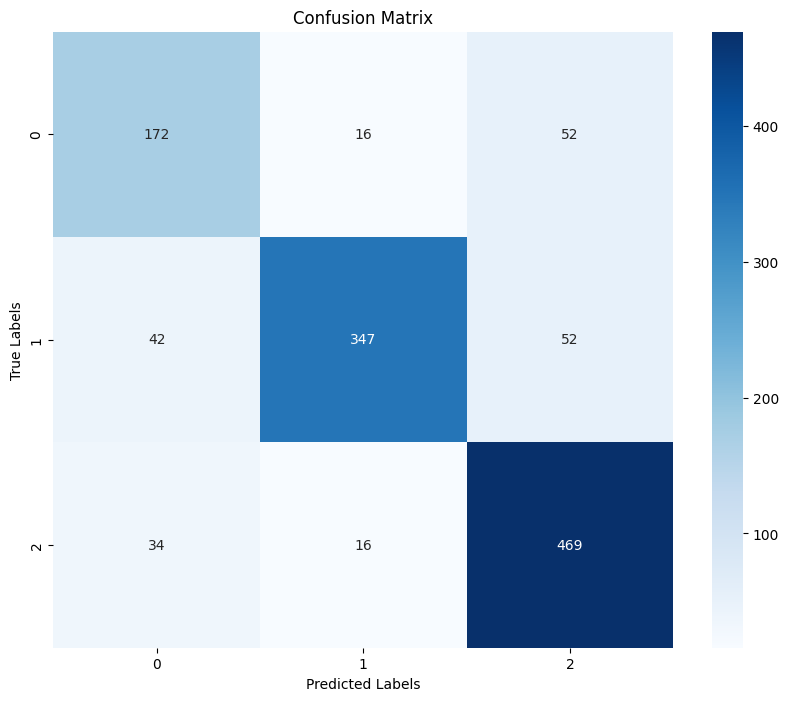

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Mengambil prediksi pada set evaluasi
preds_output = trainer.predict(eval_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(preds_output.label_ids, preds)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Lakukan prediksi manual pada eval_dataset
predictions = trainer.predict(eval_dataset)

# Ambil prediksi label dari logits
preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

# Hitung metrik manual
accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")

# Tampilkan hasil metrik
print("Evaluation metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Evaluation metrics:
Accuracy: 0.8233333333333334
Precision: 0.829181526273002
Recall: 0.8233333333333334
F1 Score: 0.8235205046186653


- **Loop Pelatihan**: Loop pelatihan terjadi dalam proses trainer.train(). Fungsi ini secara otomatis melakukan iterasi atau loop melalui dataset pelatihan, menghitung loss, memperbarui bobot, dan memantau metrics pada setiap epoch (satu kali melalui seluruh dataset pelatihan).
Di dalam trainer.train(), loop pelatihan mencakup pembaruan bobot model di setiap batch data menggunakan teknik backpropagation, sehingga model dapat mempelajari pola dari data. TrainingArguments menentukan berapa kali data akan dilewati dalam loop pelatihan melalui parameter num_train_epochs, yang dalam contoh diatur ke 3 (loop pelatihan sebanyak 3 kali).
- **Penyesuaian Hyperparameter**: Hyperparameter disetel di dalam objek `TrainingArguments`, seperti:
  - `per_device_train_batch_size`: Ukuran batch untuk data pelatihan per perangkat (GPU/CPU).
  - `per_device_eval_batch_size`: Ukuran batch untuk evaluasi per perangkat.
  - `num_train_epochs`: Jumlah epoch atau banyaknya loop pelatihan.
  - `weight_decay`: Nilai peluruhan bobot (regulasi) untuk mencegah overfitting.
- **Menggunakan Bobot yang Telah Dilatih Sebelumnya**: BERT adalah model pra-latih (pre-trained) yang telah dilatih pada sejumlah besar data teks umum, dan kita memanfaatkan bobot ini sebagai titik awal sebelum pelatihan lebih lanjut pada tugas khusus kita.
Saat memanggil `BertForSequenceClassification.from_pretrained('finiteautomata/bertweet-base-sentiment-analysis')`, kita memuat versi pra-latih BERT, yaitu `finiteautomata/bertweet-base-sentiment-analysis`, dengan bobot yang sudah dilatih sebelumnya. Ini memungkinkan model untuk memulai dari dasar yang kuat dan kemudian melakukan fine-tuning pada data spesifik kita, sehingga mempercepat pelatihan dan sering menghasilkan kinerja yang lebih baik daripada pelatihan dari awal.

# 6.

**Optimalkan performa BERT untuk tugas analisis urutan skala besar di Google Colab.**

In [ ]:
!pip install transformers
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification # Import AutoModelForSequenceClassification

Distilbert_Model= 'lxyuan/distilbert-base-multilingual-cased-sentiments-student'

tokenizer_dist = AutoTokenizer.from_pretrained(Distilbert_Model)
model_dist = AutoModelForSequenceClassification.from_pretrained(Distilbert_Model) # Now you can use AutoModelForSequenceClassification
model_dist # Print model_dist instead of model which was not defined

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
SEED = 42
MAX_LEN=120

In [ ]:
df_train, df_test = train_test_split(df_twitter_6000, stratify = df_twitter_6000[['category']] , test_size=0.2, random_state=SEED)
df_val, df_test = train_test_split(df_test, stratify = df_test[['category']], test_size=0.5, random_state=SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(4800, 2) (600, 2) (600, 2)


In [ ]:
print(tokenizer_dist, MAX_LEN, BATCH_SIZE)

DistilBertTokenizerFast(name_or_path='lxyuan/distilbert-base-multilingual-cased-sentiments-student', vocab_size=119547, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
} 120 32


In [ ]:
class IndTweetDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = IndTweetDataset(
        reviews=df.clean_text.to_numpy(),
        targets=df.category.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [ ]:
class DistilSentimentClassifier(nn.Module):
    # Constructor class
    def __init__(self, n_classes, dropout):
        super(DistilSentimentClassifier, self).__init__()
        self.bert = AutoModelForSequenceClassification.from_pretrained(Distilbert_Model)
        self.drop = nn.Dropout(p=dropout)

    # Forward propagation class
    def forward(self, input_ids, attention_mask):
        # Get the outputs from BERT (logits)
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        logits = outputs.logits

        # Apply dropout
        output = self.drop(logits)

        # Return logits after dropout
        return output

print(Distilbert_Model)

lxyuan/distilbert-base-multilingual-cased-sentiments-student


In [ ]:
def count_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # Backward prop
        loss.backward()

        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [ ]:
train_data_loader = create_data_loader(df_train, tokenizer_dist, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer_dist, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer_dist, MAX_LEN, BATCH_SIZE)
train_data_loader

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Instantiate the model and move to classifier
class_names = np.unique(df_twitter_6000[['category']])
model = DistilSentimentClassifier(len(class_names), 0.3)
model = model.to(device)
model

DistilSentimentClassifier(
  (bert): DistilBertForSequenceClassification(
    (distilbert): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(119547, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [ ]:
print(f"Trainable Parameters: {count_trainable_params(model)}")

Trainable Parameters: 135326979


In [ ]:
# Number of iterations
EPOCHS = 20

# Optimizer Adam
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=True)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps)

# Set the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/20
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.9670530982812245 accuracy 0.5141666666666667
Val loss 0.7436855168719041 accuracy 0.67

Epoch 2/20
----------
Train loss 0.675504334171613 accuracy 0.6989583333333333
Val loss 0.4959830720173685 accuracy 0.7916666666666667

Epoch 3/20
----------
Train loss 0.48465206136306127 accuracy 0.77625
Val loss 0.44226163821785075 accuracy 0.8233333333333334

Epoch 4/20
----------
Train loss 0.37868741671244305 accuracy 0.820625
Val loss 0.4335711106265846 accuracy 0.8566666666666667

Epoch 5/20
----------
Train loss 0.2996678794423739 accuracy 0.8506250000000001
Val loss 0.49326681742738737 accuracy 0.8716666666666667

Epoch 6/20
----------
Train loss 0.2527676140516996 accuracy 0.8677083333333334
Val loss 0.621820172025381 accuracy 0.8566666666666667

Epoch 7/20
----------
Train loss 0.22376099007825057 accuracy 0.885
Val loss 0.6636906434463239 accuracy 0.8650000000000001

Epoch 8/20
----------
Train loss 0.21489310186356306 accuracy 0.8795833333333334
Val loss 0.8053022426749138

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.8816666666666667

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)
y_pred

tensor([1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0,
        0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2,
        1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2,
        2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
        2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2,
        2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2,
        2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0,
        2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1,
        2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1,
        0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1,
        0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0,
        2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0,

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

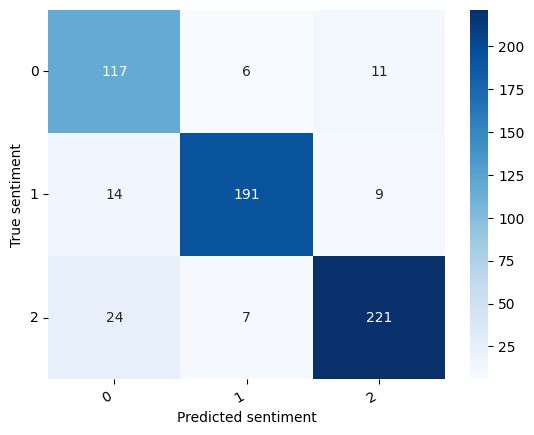

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8816666666666667
Precision: 0.88766378187379
Recall: 0.8816666666666667
F1-Score: 0.8833311372823051
